In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [139]:
mydf = pd.read_csv(r'C:\Users\micha\Downloads\archive\sp500_stocks.csv')  
mydf.head()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,2010-01-04,MMM,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-01-05,MMM,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-01-06,MMM,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-01-07,MMM,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-01-08,MMM,NaN,NaN,NaN,NaN,NaN,NaN


In [140]:
mydf = mydf.dropna()
mydf

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
3768,2010-01-04,AOS,5.937266,7.435000,7.480000,7.261667,7.295000,1104600.0
3769,2010-01-05,AOS,5.861404,7.340000,7.431667,7.308333,7.431667,1207200.0
3770,2010-01-06,AOS,5.864068,7.343333,7.405000,7.301667,7.335000,663000.0
3771,2010-01-07,AOS,5.881369,7.365000,7.425000,7.311667,7.356667,564000.0
3772,2010-01-08,AOS,5.967879,7.473333,7.485000,7.311667,7.331667,504600.0
...,...,...,...,...,...,...,...,...
1876459,2024-12-16,XYL,120.779999,120.779999,122.570000,120.000000,120.720001,1515900.0
1876460,2024-12-17,XYL,120.769997,120.769997,121.760002,119.730003,119.730003,2009200.0
1876461,2024-12-18,XYL,116.919998,116.919998,121.559998,116.879997,120.790001,1638500.0
1876462,2024-12-19,XYL,116.430000,116.430000,118.919998,116.129997,117.440002,1708000.0


In [141]:
mydf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 617831 entries, 3768 to 1876463
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date       617831 non-null  object 
 1   Symbol     617831 non-null  object 
 2   Adj Close  617831 non-null  float64
 3   Close      617831 non-null  float64
 4   High       617831 non-null  float64
 5   Low        617831 non-null  float64
 6   Open       617831 non-null  float64
 7   Volume     617831 non-null  float64
dtypes: float64(6), object(2)
memory usage: 42.4+ MB


In [142]:
mydf['Date']=pd.to_datetime(mydf['Date'])

In [143]:
mydf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 617831 entries, 3768 to 1876463
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date       617831 non-null  datetime64[ns]
 1   Symbol     617831 non-null  object        
 2   Adj Close  617831 non-null  float64       
 3   Close      617831 non-null  float64       
 4   High       617831 non-null  float64       
 5   Low        617831 non-null  float64       
 6   Open       617831 non-null  float64       
 7   Volume     617831 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 42.4+ MB


In [144]:
#let's calculate the daily returns
dailyreturns = mydf.pivot(index='Date', columns='Symbol', values='Close').pct_change()


In [146]:
dailyreturns

Symbol,ABBV,ABT,ADM,AES,AJG,ALB,ALL,ALLE,AMP,AMZN,...,VRTX,VTRS,WDC,WEC,WELL,WMB,WRB,WST,WTW,XYL
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,NaN,-0.008079,0.005402,-0.010241,-0.005374,-0.001838,0.016442,NaN,0.023320,0.005900,...,-0.033002,-0.010684,0.026513,-0.013071,0.014078,0.012494,-0.003672,-0.012668,-0.002241,NaN
2010-01-06,NaN,0.005553,-0.002528,-0.010347,0.000450,0.001841,0.000324,NaN,0.013967,-0.018116,...,-0.017532,-0.009719,0.000861,0.010187,-0.004926,0.032450,0.002047,-0.009751,0.016099,NaN
2010-01-07,NaN,0.008284,-0.010456,0.000747,-0.006301,-0.007088,0.005175,NaN,0.007491,-0.017013,...,-0.012610,-0.016903,-0.019570,-0.002017,0.002025,-0.007083,0.004087,0.003110,-0.002948,NaN
2010-01-08,NaN,0.005112,-0.012488,0.028358,0.002717,0.015071,0.004183,NaN,0.003598,0.027077,...,-0.020000,-0.033833,0.005045,0.005861,-0.010330,0.008025,-0.000814,-0.000258,-0.001109,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-16,-0.010036,-0.006703,-0.013550,-0.014981,0.004955,0.001610,-0.006318,-0.009436,0.000873,0.024048,...,0.009402,-0.007918,0.002764,-0.008460,-0.003253,-0.008451,-0.017281,0.001576,0.005652,0.001493
2024-12-17,0.021849,0.005949,-0.003869,-0.021293,-0.010804,-0.019992,-0.008307,-0.006399,-0.015230,-0.007642,...,0.002457,0.004789,-0.010107,-0.002318,0.004118,-0.005188,-0.014403,0.011163,-0.008367,-0.000083
2024-12-18,-0.013456,-0.012005,-0.031851,-0.028749,-0.015623,-0.071861,-0.021458,-0.030445,-0.033090,-0.045987,...,-0.046330,-0.026211,-0.017017,-0.018689,-0.028167,-0.031291,-0.016652,-0.026746,-0.009597,-0.031879


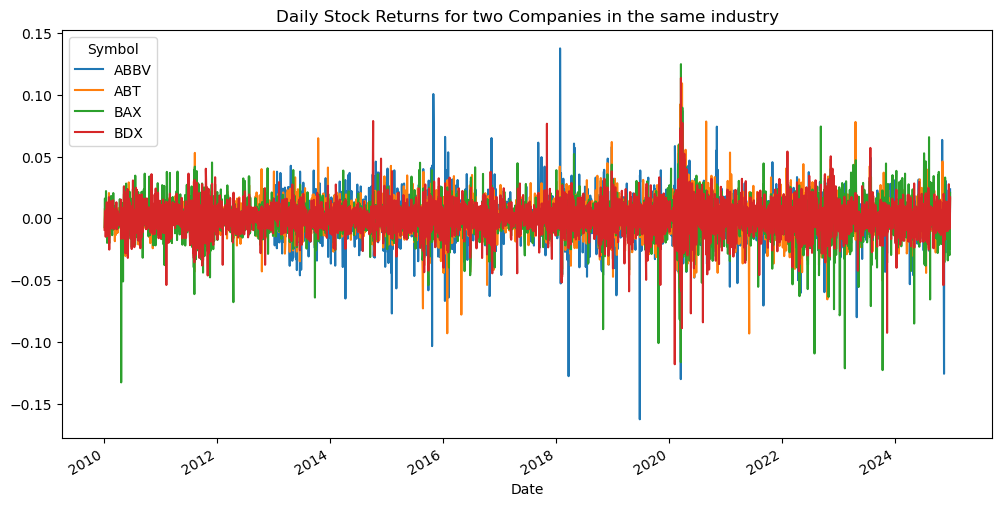

In [151]:
dailyreturns[['ABBV', 'ABT', 'BAX', 'BDX']].plot(figsize=(12,6))
plt.title('Daily Stock Returns for two Companies in the same industry')
plt.show()

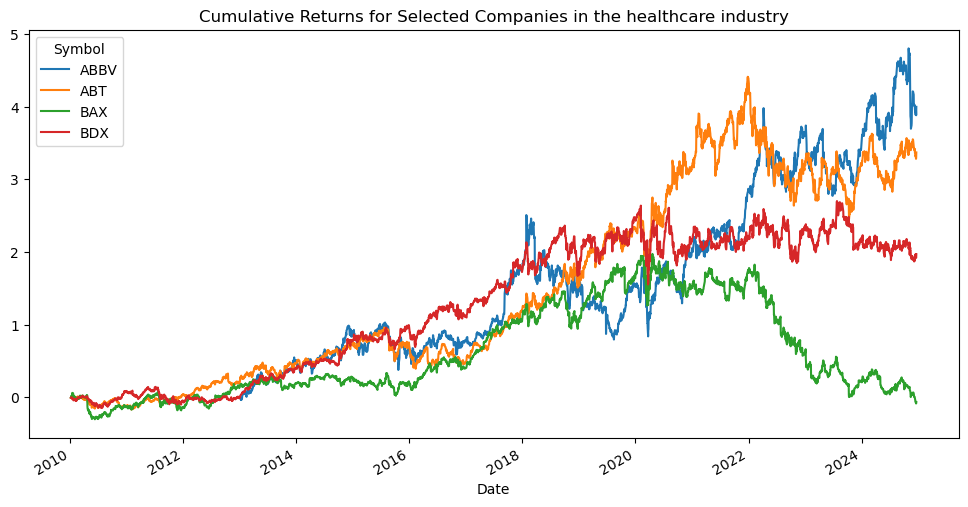

In [154]:
#let's calculate the cumulative returns of these symbols to have a broader picture of the overall performance
cumulative_returns = (1 + dailyreturns).cumprod() - 1
cumulative_returns[['ABBV', 'ABT', 'BAX', 'BDX']].plot(figsize=(12, 6))
plt.title('Cumulative Returns for Selected Companies in the healthcare industry')
plt.show()

In [159]:
#let's say we need a simple linear regression analysis for two of the interesting stocks 'ABT' and 'ABBV'
#trends with linear regression
prices = mydf.pivot(index='Date', columns='Symbol', values='Close')

In [161]:
prices

Symbol,ABBV,ABT,ADM,AES,AJG,ALB,ALL,ALLE,AMP,AMZN,...,VRTX,VTRS,WDC,WEC,WELL,WMB,WRB,WST,WTW,XYL
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,NaN,26.129908,31.469999,13.67,22.330000,38.090000,30.410000,NaN,39.880001,6.695000,...,44.240002,18.719999,45.259998,24.865000,44.040001,17.616472,7.262222,19.735001,70.913910,NaN
2010-01-05,NaN,25.918797,31.639999,13.53,22.209999,38.020000,30.910000,NaN,40.810001,6.734500,...,42.779999,18.520000,46.459999,24.540001,44.660000,17.836576,7.235556,19.485001,70.754967,NaN
2010-01-06,NaN,26.062737,31.559999,13.39,22.219999,38.090000,30.920000,NaN,41.380001,6.612500,...,42.029999,18.340000,46.500000,24.790001,44.439999,18.415367,7.250370,19.295000,71.894043,NaN
2010-01-07,NaN,26.278646,31.230000,13.40,22.080000,37.820000,31.080000,NaN,41.689999,6.500000,...,41.500000,18.030001,45.590000,24.740000,44.529999,18.284937,7.280000,19.355000,71.682121,NaN
2010-01-08,NaN,26.412991,30.840000,13.78,22.139999,38.389999,31.209999,NaN,41.840000,6.676000,...,40.669998,17.420000,45.820000,24.885000,44.070000,18.431671,7.274074,19.350000,71.602646,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-16,171.630005,112.620003,51.689999,13.15,286.000000,99.540001,195.020004,137.520004,550.239990,232.929993,...,468.089996,12.530000,65.300003,94.930000,128.699997,53.970001,59.709999,330.570007,313.149994,120.779999
2024-12-17,175.380005,113.290001,51.490002,12.87,282.910004,97.550003,193.399994,136.639999,541.859985,231.149994,...,469.239990,12.590000,64.639999,94.709999,129.229996,53.689999,58.849998,334.260010,310.529999,120.769997
2024-12-18,173.020004,111.930000,49.849998,12.50,278.489990,90.540001,189.250000,132.479996,523.929993,220.520004,...,447.500000,12.260000,63.540001,92.940002,125.589996,52.009998,57.869999,325.320007,307.549988,116.919998


In [163]:
X = np.arange(len(prices)).reshape(-1, 1)  
y = prices['ABT'].dropna().values.reshape(-1, 1)


In [165]:
model = LinearRegression()
model.fit(X, y)
trend = model.predict(X)

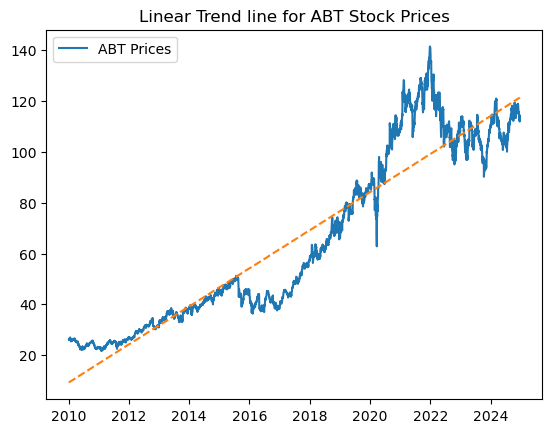

In [167]:
plt.plot(prices['ABT'], label='ABT Prices')
plt.plot(prices.index, trend, linestyle='--')
plt.legend()
plt.title('Linear Trend line for ABT Stock Prices')
plt.show()

In [169]:
#let's do the same for ABBV
#I found out that there are some missing values for ABBV stock in the prices table that causes an error due to the difference
#between the number of rows in the independent variable (date) and the number of rows in the dependent variable (price)
#so i need to add a fix to that and then proceed with the linear regression modeling.
newprices = prices[['ABBV']].dropna()

X = np.arange(len(newprices)).reshape(-1, 1)
y = newprices['ABBV'].dropna().values.reshape(-1, 1)

In [171]:

model2 = LinearRegression()
model2.fit(X, y)
trend = model2.predict(X)

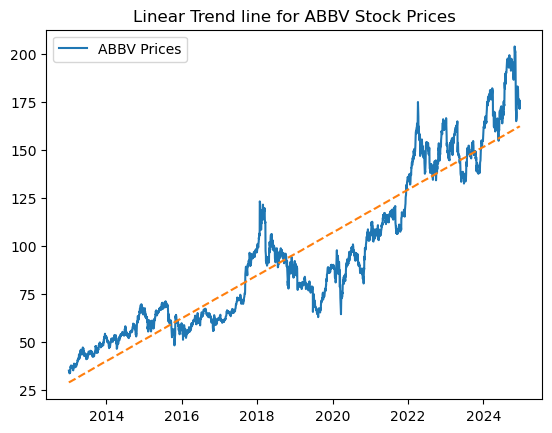

In [173]:
plt.plot(newprices['ABBV'], label='ABBV Prices')
plt.plot(newprices.index, trend, linestyle='--')
plt.legend()
plt.title('Linear Trend line for ABBV Stock Prices')
plt.show()

In [177]:
#which one do you choose for future investment? let's do a simple slope analysis
slope = model.coef_[0][0]
slope2 = model2.coef_[0][0]


In [179]:
print('ABT slope:',slope)
print('ABBV slope:',slope2)

ABT slope: 0.02976142481492589
ABBV slope: 0.044277574487213846


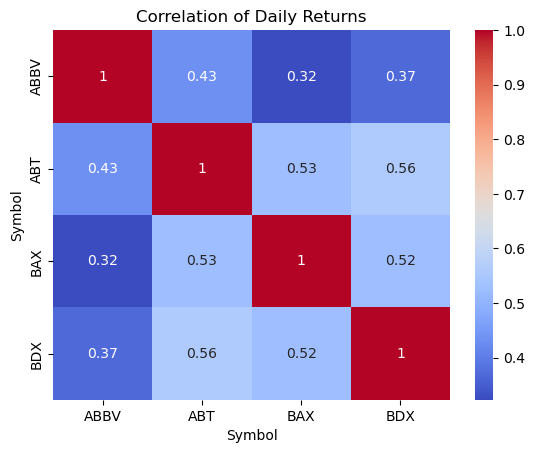

In [157]:
#Extra Analysis. finding how correlated the price of those chosen stocks are

correlation = dailyreturns[['ABBV', 'ABT', 'BAX', 'BDX']].corr()


import seaborn as sns
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation of Daily Returns')
plt.show()